In [1]:
import numpy as np
import sys
import os
from scipy import stats
import pandas as pd
import glob as glob
import seaborn as sns
from itertools import combinations 
import matplotlib.pyplot as plt
from scipy.io import loadmat

%matplotlib inline

In [2]:
def grouped_lineplot(df, x, y, hue, ymin=0, ymax=1, title=None, outfile=None):
    fig, ax = plt.subplots(figsize=(12.5,7.5))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df,
                       palette="cubehelix", estimator=np.median, ax=ax)

    sns.despine(ax=ax, left=True)
    ax.set_title(title,fontsize=24)
    ax.set_ylabel(y,fontsize=24)
    ax.set_xlabel('order',fontsize=24)
    ax.set_ylim(ymin, ymax)
    l = ax.legend(loc='center right', bbox_to_anchor=(1.35, .65), ncol=1,fontsize=24)
    for line in l.get_lines():
        line.set_linewidth(4.0)
    #l.set_title(hue,prop={'size':24})
    ax.tick_params(labelsize=24)
    if not outfile:
        fig.show()
    else:
        fig.savefig(outfile, bbox_inches='tight')

In [3]:
def grouped_barplot(df, x, y, hue, ymin=0, ymax=1, title=None, outfile=None):
    fig, ax = plt.subplots(figsize=(12.5,7.5))
    g = sns.factorplot(x=x, y=y, hue=hue, data=df, size=8, kind="bar", estimator=np.median, ci=95, n_boot=1000,
                       palette="cubehelix", ax=ax, order=['intact', 'paragraph', 'word', 'rest'])

    sns.despine(ax=ax, left=True)
    ax.set_title(title, fontsize=24)
    ax.set_ylabel(y, fontsize=20)
    ax.set_xlabel(x, fontsize=20)
    ax.set_ylim(ymin, ymax)
    ax.hlines(y=1/300, xmin=-.5, xmax=3.5, linewidth=2, color='r')
    l = ax.legend(loc='center right', bbox_to_anchor=(1, .65), ncol=2, fontsize=16)
    l.set_title(hue,prop={'size':24})
    if not outfile:
        fig.show()
    else:
        fig.savefig(outfile, bbox_inches='tight')

In [4]:
figdir = '../figs'
if not os.path.exists(figdir):
    os.mkdir(figdir)

In [5]:
factors = 700

In [6]:
if factors == 100:
    pieman_name = '../../data/pieman_ica100.mat'
else:
    pieman_name = '../../data/pieman_data.mat'

center_name = '../../data/pieman_posterior_K700.mat'

In [7]:
pieman_name

'../../data/pieman_data.mat'

In [8]:
pieman_data = loadmat(pieman_name)
center_data = loadmat(center_name)

In [9]:
#factor_data_dir = os.path.join(os.getenv('HOME'), 'Desktop', 'timecorr_env', 'timecorr_paper', 'pieman', 'results_' + str(factors))

In [10]:
factor_data_dir = os.path.join(os.getenv('HOME'), 'Desktop', 'timecorr_env', 'timecorr_paper', 'pieman', 'results')

In [11]:
analysis_name = 'level_analysis_optimized'

In [12]:
data_dir = os.path.join(factor_data_dir, analysis_name)

In [13]:
data_dir

'/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/level_analysis_optimized'

In [14]:
params =glob.glob(os.path.join(data_dir, '*'))

In [15]:
params

['/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/level_analysis_optimized/isfc_PCA_gaussian_10']

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


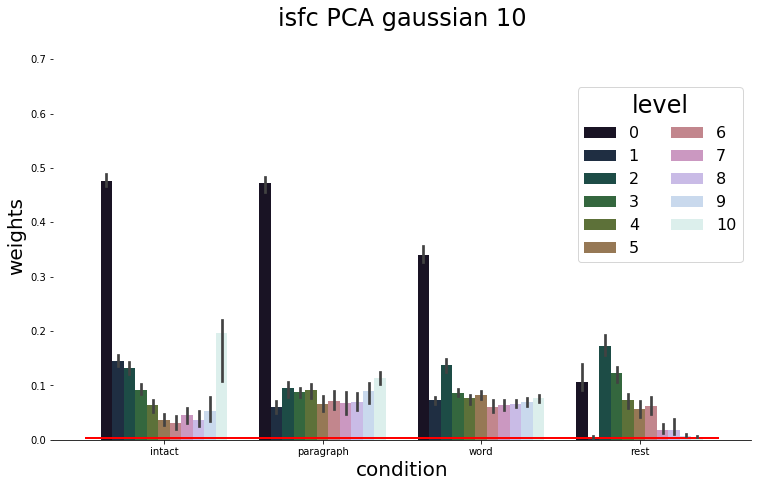

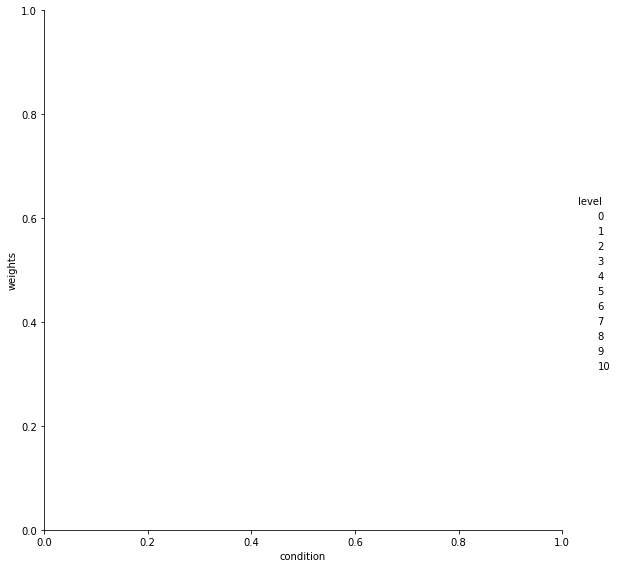

In [16]:

for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['condition'] = os.path.basename(os.path.splitext(c)[0])

        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)

        melted_df = pd.DataFrame()
        for c in np.arange(full_data['level'].max() + 2):
            if c!=full_data['level'].max() + 1:
                melted_temp_df = pd.DataFrame()
                melted_temp_df['weights'] = full_data['level_' + str(c)]
                melted_temp_df['level'] = full_data['level']
                melted_temp_df['level'] = c
                melted_temp_df['condition'] = full_data['condition']

                if melted_df.empty:
                    melted_df = melted_temp_df
                else:
                    melted_df = melted_df.append(melted_temp_df)
            else:

                melted_temp_df = pd.DataFrame()
                melted_temp_df['weights'] = full_data['accuracy']
                melted_temp_df['level'] = full_data['level']
                #melted_temp_df['level'] = 'accuracy'
                melted_temp_df['condition'] = full_data['condition']
                melted_df = melted_df.append(melted_temp_df)
                full_data['error'] = 1-full_data['error']

    p_split = param_name.split('_')

    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

    outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '_'+ str(factors)+ '.pdf')
    grouped_barplot(melted_df, 'condition', 'weights', 'level', ymin=0, ymax=.75, title=title, outfile=outfile)
    plt.show()
    plt.close()

In [17]:
full_data

,Unnamed: 0,accuracy,error,folds,level,level_0,level_1,level_10,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,rank,iteration,condition
0,0,0.273333,0.109333,0,0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.961833,0,intact
1,0,0.293333,0.085100,0,1,0.536573,4.634271e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.971078,0,intact
2,0,0.303333,0.069100,0,2,0.333333,3.333329e-01,NaN,3.333342e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.972367,0,intact
3,0,0.293333,0.088244,0,3,0.371792,1.282520e-01,NaN,2.162672e-01,2.836891e-01,NaN,NaN,NaN,NaN,NaN,NaN,0.969089,0,intact
4,0,0.296667,0.086322,0,4,0.409016,2.408063e-01,NaN,4.971692e-02,1.029833e-01,1.974772e-01,NaN,NaN,NaN,NaN,NaN,0.970478,0,intact
5,0,0.283333,0.098389,0,5,0.666057,1.208605e-01,NaN,4.142853e-02,1.386831e-01,2.224095e-02,1.072950e-02,NaN,NaN,NaN,NaN,0.967033,0,intact
6,0,0.286667,0.098078,0,6,0.722358,1.670570e-01,NaN,1.734448e-17,1.105846e-01,0.000000e+00,1.609363e-21,1.040631e-17,NaN,NaN,NaN,0.967922,0,intact
7,0,0.290000,0.095800,0,7,0.471308,5.140829e-02,NaN,2.042795e-01,1.426237e-01,7.218765e-03,0.000000e+00,2.824897e-17,1.231622e-01,NaN,NaN,0.966667,0,intact
8,0,0.276667,0.103989,0,8,0.878634,6.628344e-02,NaN,1.106004e-02,4.402218e-02,0.000000e+00,3.357426e-18,0.000000e+00,6.322250e-18,1.161542e-21,NaN,0.964544,0,intact
9,0,0.270000,0.111611,0,9,0.677335,6.244124e-17,NaN,5.586615e-02,1.040944e-17,3.667093e-22,1.040797e-17,8.189841e-21,2.667965e-01,1.871808e-06,3.902755e-17,0.962667,0,intact


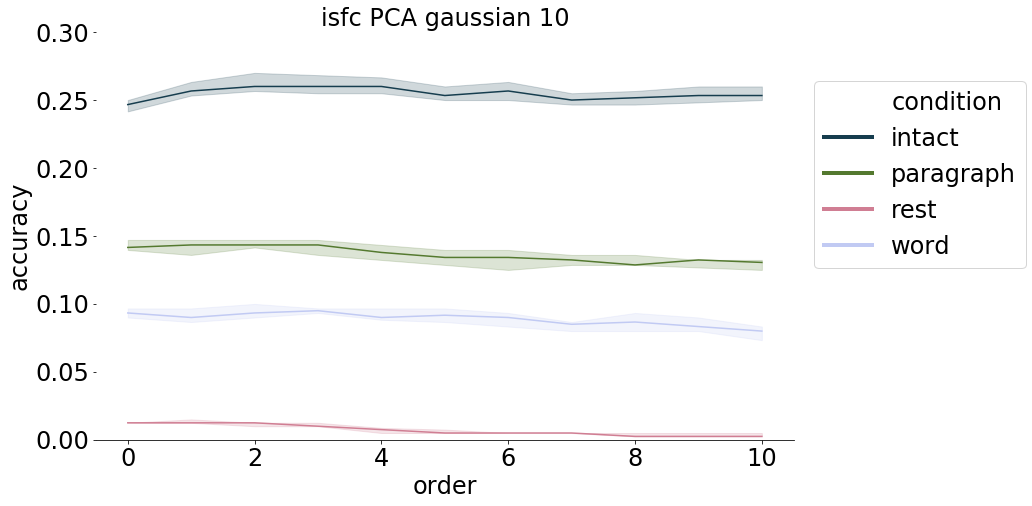

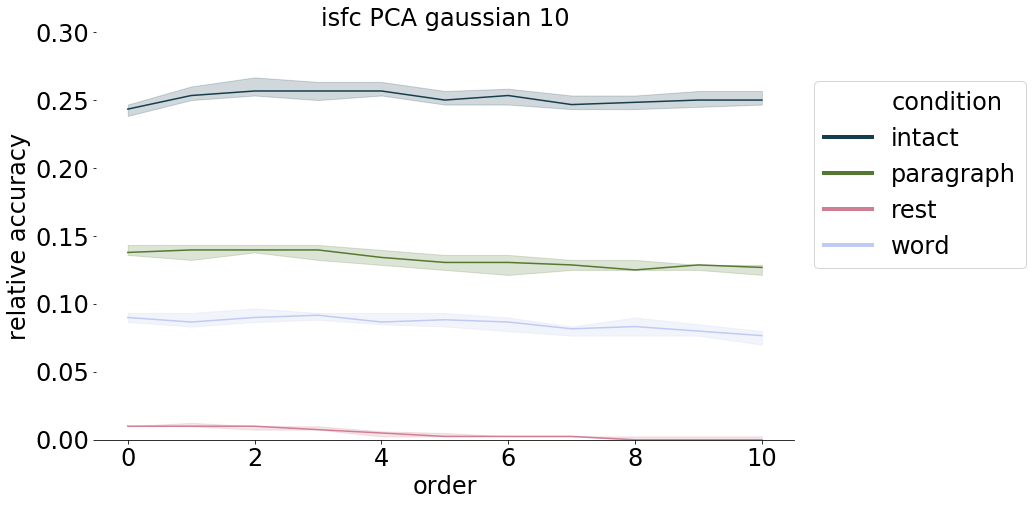

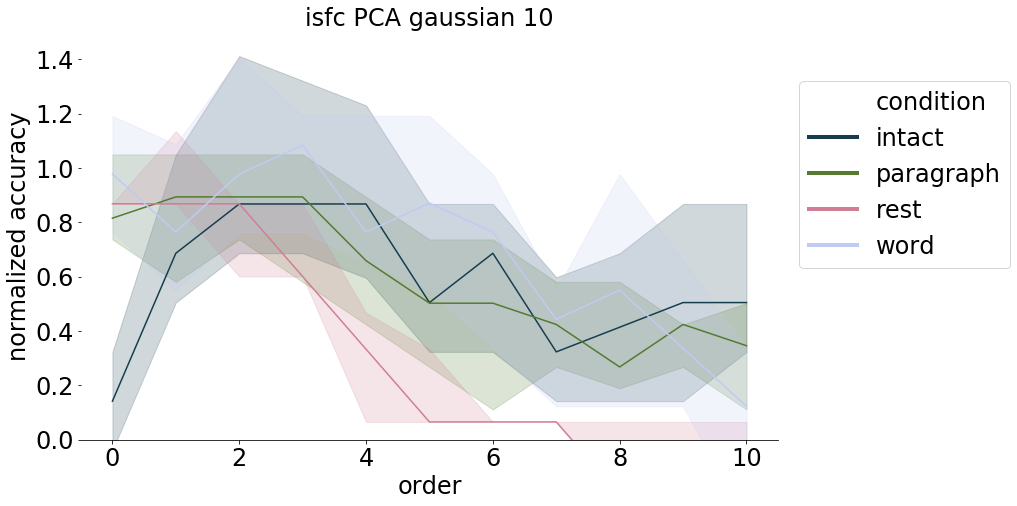

In [18]:

for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        
        cond_name = os.path.basename(os.path.splitext(c)[0])
        chance = 1/300      
        if cond_name == 'paragraph':
            chance = 1/272
        elif cond_name == 'rest':
            chance = 1/400
        
        data = pd.read_csv(c)
        data['condition'] = os.path.basename(os.path.splitext(c)[0])
        #data['level'] = 20 - data.isnull().sum(axis=1)
        data['relative accuracy'] = data['accuracy'] - chance
        data['normalized accuracy']= data['accuracy'] - np.min(data.groupby('level')['accuracy'].mean())
        data['normalized accuracy'] = data['normalized accuracy'] / np.max(data.groupby('level')['normalized accuracy'].mean())
   
        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)



    p_split = param_name.split('_')

    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 
    
    outfile = os.path.join(figdir, param_name + '_line_'+ analysis_name + '.pdf')
    grouped_lineplot(full_data, 'level', 'accuracy','condition', ymin=0, ymax=.3, title=title, outfile=outfile)
    plt.show()
    plt.close()
    
    outfile = os.path.join(figdir, param_name + '_relative_line_'+ analysis_name + '.pdf')
    grouped_lineplot(full_data, 'level', 'relative accuracy','condition', ymin=0, ymax=.3, title=title, outfile=outfile)
    plt.show()
    plt.close()
    
    outfile = os.path.join(figdir, param_name + '_normalized_line_'+ analysis_name + '.pdf')
    grouped_lineplot(full_data, 'level', 'normalized accuracy','condition', ymin=0, ymax=1.5, title=title, outfile=outfile)
    plt.show()
    plt.close()

In [19]:
full_data

,Unnamed: 0,accuracy,error,folds,level,level_0,level_1,level_10,level_2,level_3,...,level_5,level_6,level_7,level_8,level_9,rank,iteration,condition,relative accuracy,normalized accuracy
0,0,0.273333,0.109333,0,0,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.961833,0,intact,0.270000,1.593137
1,0,0.293333,0.085100,0,1,0.536573,4.634271e-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.971078,0,intact,0.290000,2.681373
2,0,0.303333,0.069100,0,2,0.333333,3.333329e-01,NaN,3.333342e-01,NaN,...,NaN,NaN,NaN,NaN,NaN,0.972367,0,intact,0.300000,3.225490
3,0,0.293333,0.088244,0,3,0.371792,1.282520e-01,NaN,2.162672e-01,2.836891e-01,...,NaN,NaN,NaN,NaN,NaN,0.969089,0,intact,0.290000,2.681373
4,0,0.296667,0.086322,0,4,0.409016,2.408063e-01,NaN,4.971692e-02,1.029833e-01,...,NaN,NaN,NaN,NaN,NaN,0.970478,0,intact,0.293333,2.862745
5,0,0.283333,0.098389,0,5,0.666057,1.208605e-01,NaN,4.142853e-02,1.386831e-01,...,1.072950e-02,NaN,NaN,NaN,NaN,0.967033,0,intact,0.280000,2.137255
6,0,0.286667,0.098078,0,6,0.722358,1.670570e-01,NaN,1.734448e-17,1.105846e-01,...,1.609363e-21,1.040631e-17,NaN,NaN,NaN,0.967922,0,intact,0.283333,2.318627
7,0,0.290000,0.095800,0,7,0.471308,5.140829e-02,NaN,2.042795e-01,1.426237e-01,...,0.000000e+00,2.824897e-17,1.231622e-01,NaN,NaN,0.966667,0,intact,0.286667,2.500000
8,0,0.276667,0.103989,0,8,0.878634,6.628344e-02,NaN,1.106004e-02,4.402218e-02,...,3.357426e-18,0.000000e+00,6.322250e-18,1.161542e-21,NaN,0.964544,0,intact,0.273333,1.774510
9,0,0.270000,0.111611,0,9,0.677335,6.244124e-17,NaN,5.586615e-02,1.040944e-17,...,1.040797e-17,8.189841e-21,2.667965e-01,1.871808e-06,3.902755e-17,0.962667,0,intact,0.266667,1.411765


In [20]:
pieman_conds = ['intact', 'paragraph', 'word', 'rest']

In [21]:
comb = combinations(pieman_conds, 2)

In [22]:
list(comb)

[('intact', 'paragraph'),
 ('intact', 'word'),
 ('intact', 'rest'),
 ('paragraph', 'word'),
 ('paragraph', 'rest'),
 ('word', 'rest')]

In [23]:
param_grid = [(c, r) for c in cfuns for r in rfuns

SyntaxError: unexpected EOF while parsing (<ipython-input-23-c24c1b430574>, line 1)

In [24]:
pieman_conds = ['intact', 'paragraph', 'word', 'rest']
combs = combinations(pieman_conds, 2)
for c in combs:
    
    t_stat = stats.ttest_rel(full_data[full_data['condition']==c[0]]['accuracy'],full_data[full_data['condition']==c[1]]['accuracy'], nan_policy='omit')
    
    print(c[0], c[1], t_stat)


ValueError: unequal length arrays

In [32]:
p_df = full_data[full_data['condition']=='intact']
p_df

,Unnamed: 0,accuracy,error,folds,level,level_0,level_1,level_10,level_2,level_3,...,level_5,level_6,level_7,level_8,level_9,rank,iteration,condition,relative accuracy,normalized accuracy
0,0,0.273333,0.109333,0,0,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.961833,0,intact,0.270000,1.593137
1,0,0.293333,0.085100,0,1,0.536573,4.634271e-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.971078,0,intact,0.290000,2.681373
2,0,0.303333,0.069100,0,2,0.333333,3.333329e-01,NaN,3.333342e-01,NaN,...,NaN,NaN,NaN,NaN,NaN,0.972367,0,intact,0.300000,3.225490
3,0,0.293333,0.088244,0,3,0.371792,1.282520e-01,NaN,2.162672e-01,2.836891e-01,...,NaN,NaN,NaN,NaN,NaN,0.969089,0,intact,0.290000,2.681373
4,0,0.296667,0.086322,0,4,0.409016,2.408063e-01,NaN,4.971692e-02,1.029833e-01,...,NaN,NaN,NaN,NaN,NaN,0.970478,0,intact,0.293333,2.862745
5,0,0.283333,0.098389,0,5,0.666057,1.208605e-01,NaN,4.142853e-02,1.386831e-01,...,1.072950e-02,NaN,NaN,NaN,NaN,0.967033,0,intact,0.280000,2.137255
6,0,0.286667,0.098078,0,6,0.722358,1.670570e-01,NaN,1.734448e-17,1.105846e-01,...,1.609363e-21,1.040631e-17,NaN,NaN,NaN,0.967922,0,intact,0.283333,2.318627
7,0,0.290000,0.095800,0,7,0.471308,5.140829e-02,NaN,2.042795e-01,1.426237e-01,...,0.000000e+00,2.824897e-17,1.231622e-01,NaN,NaN,0.966667,0,intact,0.286667,2.500000
8,0,0.276667,0.103989,0,8,0.878634,6.628344e-02,NaN,1.106004e-02,4.402218e-02,...,3.357426e-18,0.000000e+00,6.322250e-18,1.161542e-21,NaN,0.964544,0,intact,0.273333,1.774510
9,0,0.270000,0.111611,0,9,0.677335,6.244124e-17,NaN,5.586615e-02,1.040944e-17,...,1.040797e-17,8.189841e-21,2.667965e-01,1.871808e-06,3.902755e-17,0.962667,0,intact,0.266667,1.411765


In [37]:
max_level = p_df.groupby('level')

In [38]:
max_level

In [25]:
pieman_conds = ['intact', 'paragraph', 'word', 'rest']
for c in pieman_conds:
    p_df = full_data[full_data['condition']==c]
    max_level = p_df.groupby('level').mean()['accuracy'].argmax()
    t_stat = stats.ttest_rel(full_data[full_data['level']==0]['accuracy'],full_data[full_data['level']==max_level]['accuracy'], nan_policy='omit')
    print('condition: ' + c + ' max level: ' + str(max_level), t_stat)

condition: intact max level: 2 Ttest_relResult(statistic=-6.759068919095979, pvalue=3.4362135675012405e-11)
condition: paragraph max level: 2 Ttest_relResult(statistic=-6.759068919095979, pvalue=3.4362135675012405e-11)
condition: word max level: 2 Ttest_relResult(statistic=-6.759068919095979, pvalue=3.4362135675012405e-11)
condition: rest max level: 1 Ttest_relResult(statistic=-3.61925218642337, pvalue=0.0003216894836752849)


/Users/lucyowen/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:4: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  after removing the cwd from sys.path.


In [ ]:
#center_data['posterior'][0][0][4]

In [ ]:
#centers = np.asarray(center_data['posterior']['centers'][0][0][0][0][0])

In [ ]:
#centers.shape

In [ ]:
#center_data['posterior']['centers'][0][0][0][0][1]

In [ ]:
#center_data['posterior']['widths'][0][0][0][0][0]

In [ ]:
#center_data['posterior']['widths'][0][0][0][0][1]